In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Load Data


In [2]:
titanic_file_path = '../input/titanic/train.csv'
survivor_data = pd.read_csv(titanic_file_path, index_col='PassengerId')
survivor_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
# Number of rows and columns 
survivor_data.shape

(891, 11)

In [4]:
survivor_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
y = survivor_data.Survived
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [6]:
survivor_data.drop('Name', axis=1, inplace=True)
survivor_data.drop('Ticket', axis=1, inplace=True)

In [7]:
# Shape of training data (num_rows, num_columns)
print(survivor_data.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (survivor_data.isnull().sum())
print(missing_val_count_by_column)
print(100 * missing_val_count_by_column/survivor_data.shape[0])

(891, 9)
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


In [8]:
print(survivor_data.Age.describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [9]:
survivor_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [10]:
# drop entire `Cabin` column
survivor_data.drop('Cabin', axis=1, inplace=True)

In [11]:
survivor_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [12]:
survivor_data.dropna(subset=['Embarked'], inplace=True)

In [13]:
survivor_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [14]:
# Get list of categorical variables
s = (survivor_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Sex', 'Embarked']


In [15]:
survivor_data.Sex.unique()

array(['male', 'female'], dtype=object)

In [16]:
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data 
label_survivor_data = survivor_data.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_survivor_data[object_cols] = ordinal_encoder.fit_transform(survivor_data[object_cols])

In [17]:
print("Category to Label Mapping:")
print(ordinal_encoder.categories_)

Category to Label Mapping:
[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]


In [18]:
label_survivor_data.shape

(889, 8)

In [19]:
label_survivor_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [20]:
label_survivor_data.Sex.unique()

array([1., 0.])

In [21]:
label_survivor_data.Embarked.unique()

array([2., 0., 1.])

In [22]:
label_survivor_data.Age.isnull().sum()

177

In [23]:
from sklearn.impute import SimpleImputer

# Fill in the lines below: imputation
my_imputer = SimpleImputer() # Your code here
imputed_survivor_data = pd.DataFrame(my_imputer.fit_transform(label_survivor_data))

# Fill in the lines below: imputation removed column names; put them back
imputed_survivor_data.columns = label_survivor_data.columns

In [24]:
imputed_survivor_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [25]:
missing_val_count_by_column = (imputed_survivor_data.isnull().sum())
print(missing_val_count_by_column)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [26]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = imputed_survivor_data[features]

# X = imputed_survivor_data.drop(['Survived'], axis=1)

y = imputed_survivor_data.Survived

In [27]:
from sklearn.model_selection import train_test_split

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)


In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=2, random_state=1)
dt_model.fit(X_train, y_train)

dt_train_predictions = dt_model.predict(X_train)
dt_valid_predictions = dt_model.predict(X_valid)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_true = y_train
y_pred = dt_train_predictions

accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")


conf_matrix_df = pd.DataFrame(conf_matrix, 
                     index=['True 0', 'True 1'], 
                     columns=['Predicted 0', 'Predicted 1'])
print(conf_matrix_df)

Accuracy: 0.81
        Predicted 0  Predicted 1
True 0          376           68
True 1           65          202


In [30]:
print(f"Total number of rows in training data: {len(y_true)}")
print(f"No. Died (0): {len(y_true[y_true==0])}")
print(f"No. Survived (1): {len(y_true[y_true==1])}")

Total number of rows in training data: 711
No. Died (0): 444
No. Survived (1): 267


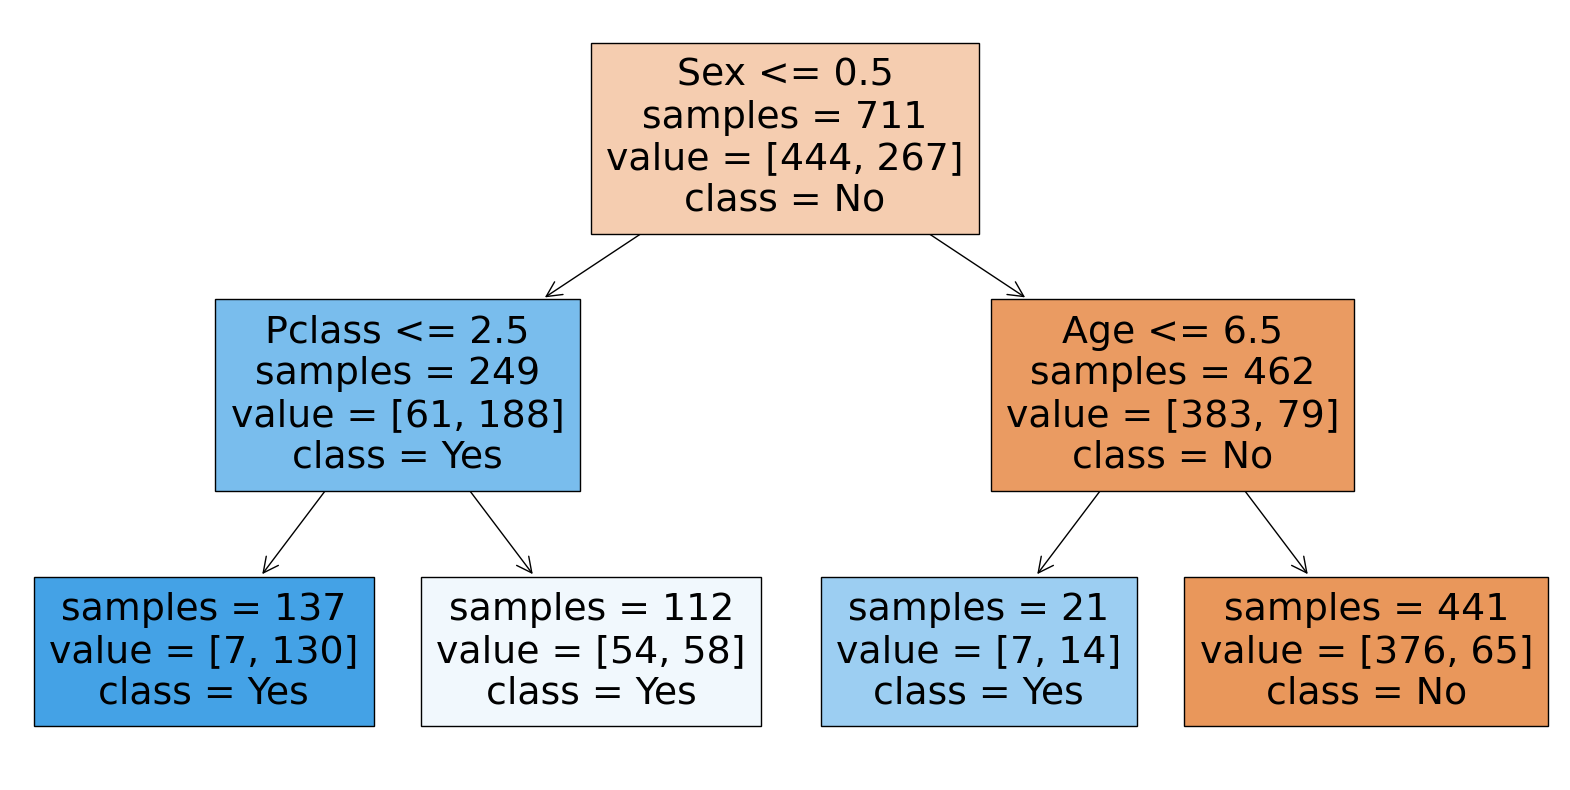

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, impurity = False, class_names=['No', 'Yes'], filled=True)
plt.show()

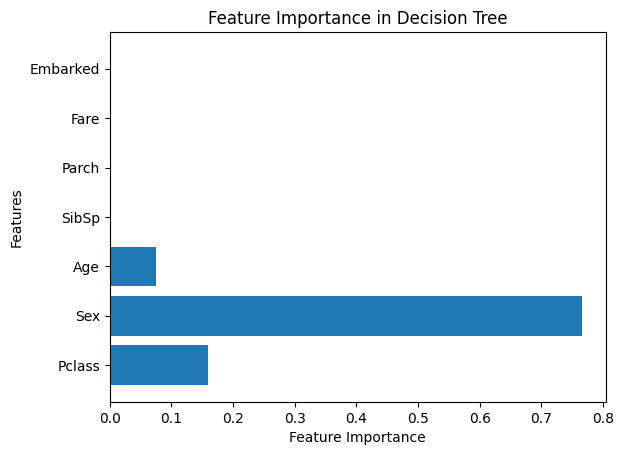

In [32]:
# Plot feature importance
feature_importances = dt_model.feature_importances_
features = np.array(X_train.columns)

plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

In [33]:
y_true = y_valid
y_pred = dt_valid_predictions

accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")


conf_matrix_df = pd.DataFrame(conf_matrix, 
                     index=['True 0', 'True 1'], 
                     columns=['Predicted 0', 'Predicted 1'])
print(conf_matrix_df)

Accuracy: 0.72
        Predicted 0  Predicted 1
True 0           84           21
True 1           28           45


In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=1)
rf_model.fit(X_train, y_train)

rf_valid_predictions = rf_model.predict(X_valid)

In [35]:
y_true = y_valid
y_pred = rf_valid_predictions

accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")


conf_matrix_df = pd.DataFrame(conf_matrix, 
                     index=['True 0', 'True 1'], 
                     columns=['Predicted 0', 'Predicted 1'])
print(conf_matrix_df)

Accuracy: 0.74
        Predicted 0  Predicted 1
True 0           99            6
True 1           41           32


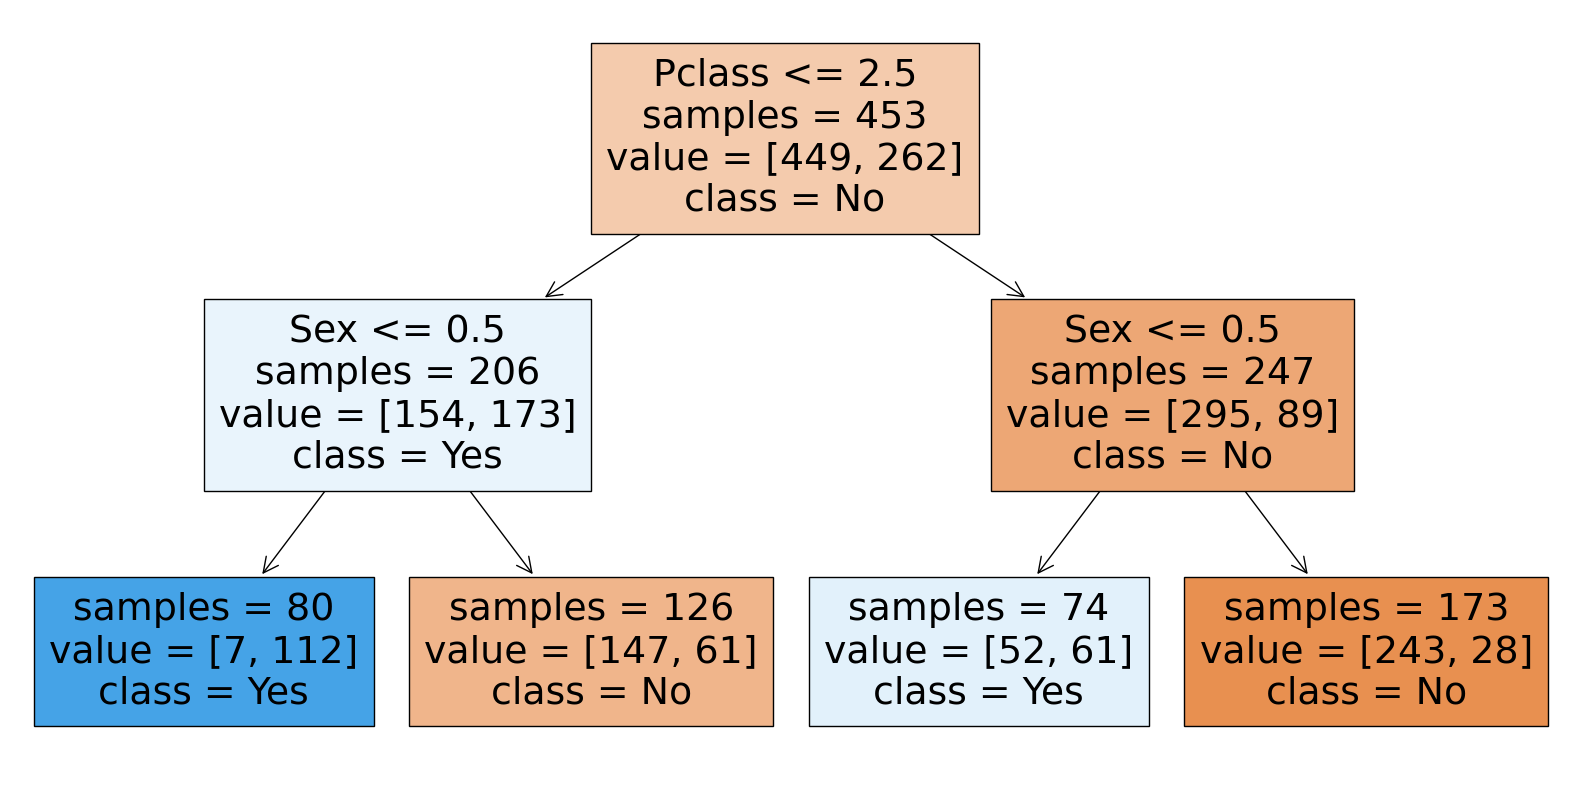

In [36]:
# Visualize the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[25], feature_names=X_train.columns, impurity = False, class_names=['No', 'Yes'], filled=True)
plt.show()

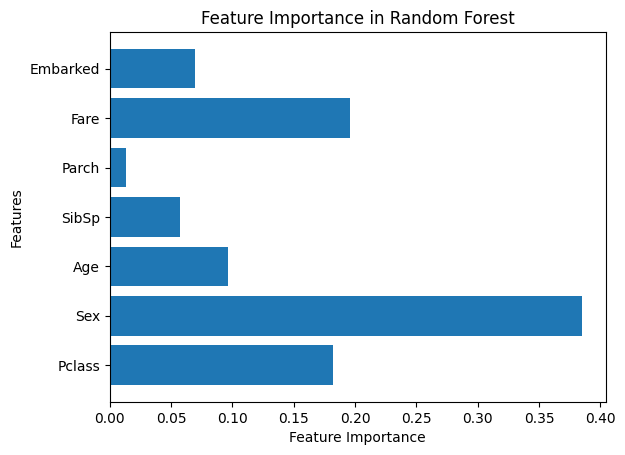

In [37]:
# Plot feature importance
feature_importances = rf_model.feature_importances_
features = np.array(X_train.columns)

plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()